# Machine Learning with Tree-Based Models in Python

---

***Descripción del curso*** 

---

Los árboles de decisión son modelos de aprendizaje supervisado que se utilizan para problemas de clasificación y regresión. Los modelos de árboles presentan una alta flexibilidad que tiene un precio: por un lado, los árboles pueden capturar relaciones complejas no lineales; por otro lado, tienden a memorizar el ruido presente en un conjunto de datos. Al agregar las predicciones de árboles que se entrenan de manera diferente, los métodos de conjunto aprovechan la flexibilidad de los árboles al tiempo que reducen su tendencia a memorizar el ruido. Los métodos de conjunto se utilizan en una variedad de campos y tienen un historial comprobado de ganar muchas competencias de aprendizaje automático. 

En este curso, aprenderá a usar Python para entrenar árboles de decisión y modelos basados ​​en árboles con la biblioteca de aprendizaje automático scikit-learn fácil de usar. Comprenderá las ventajas y las deficiencias de los árboles y demostrará cómo el conjunto puede aliviar estas deficiencias, mientras practica con conjuntos de datos del mundo real. Por último, también comprenderá cómo ajustar los hiperparámetros más influyentes para aprovechar al máximo sus modelos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # Importar la division de prueba y test del modelo

## 1. Classification and Regression Trees
**(Árboles de clasificación y regresión)**

Los árboles de clasificación y regresión (CART) son un conjunto de modelos de aprendizaje supervisado que se utilizan para problemas que involucran clasificación y regresión. En este capítulo, se le presentará el algoritmo CART.

In [4]:
# Los arboles no necesitan que los features esten en una misma escala
# Las regiones de decision estan separadas por limites de desicion

[Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Podrá predecir si un tumor es maligno o benigno basándose en dos características: el radio medio del tumor (radio_mean) y su número medio de puntos cóncavos (puntos cóncavos_mean).

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/wbc.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df['diagnosis2'] = [ 1 if i == 'M' else 0 for i in df['diagnosis'] ]

In [7]:
X = df[['radius_mean','concave points_mean']]
y = df['diagnosis2']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, stratify=y) 

*   Clase 1 corresponde a un tumor maligno
*   Clase 0 corresponde a un tumor benigno


In [9]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

SEED = 1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


¡Impresionante! ¡Acabas de entrenar tu primer árbol de clasificación! Puede ver las primeras cinco predicciones realizadas por el árbol ajustado en el conjunto de prueba en la consola. En el siguiente ejercicio, evaluará el rendimiento del árbol en todo el conjunto de pruebas.

In [10]:
# Evaluar el árbol de clasificación

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


¡Usando solo dos funciones, su árbol pudo lograr una precisión del 89%!

### Logistic regression vs classification tree

Un árbol de clasificación divide el espacio de características en regiones rectangulares. Por el contrario, un modelo lineal como la regresión logística produce solo un límite de decisión lineal único que divide el espacio de características en dos regiones de decisión.

In [11]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train,y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
# plot_labeled_decision_regions(X_test, y_test, clfs)

![texto del enlace](https://i.ibb.co/RcHSVBh/Screenshot-22.png)



¡Buen trabajo! Observe cómo el límite de decisión producido por la regresión logística es lineal, mientras que los límites producidos por el árbol de clasificación dividen el espacio de características en regiones rectangulares.

In [12]:
# Un arbol de decisiones es una estructura de datos 
# que consta de una jerarquia de unidades individuales llamadas nodos

# NODO es un punto que involucra una pregunta o predicion
# HOJA es un nodo que no tiene hijos
# ROOT es un nodo que no nodo padre

In [13]:
# Criterios para medir la impureza de un nodo
# Indice GINI y la ENTROPIA

In [14]:
X = df.drop(['id','Unnamed: 32','diagnosis','diagnosis2'], axis=1)
y = df['diagnosis2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, stratify=y) 

In [15]:
X.shape

(569, 30)

In [16]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [17]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train,y_train)

y_pred= dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)

¡Maravilloso! En el siguiente ejercicio, comparará la precisión de dt_entropy con la precisión de otro árbol entrenado utilizando el índice gini como criterio de información. 

In [18]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9298245614035088


¡Buen trabajo! Observe cómo los dos modelos logran exactamente la misma precisión. La mayoría de las veces, el índice de gini y la entropía conducen a los mismos resultados. El índice gini es un poco más rápido de calcular y es el criterio predeterminado utilizado en el modelo DecisionTreeClassifier de scikit-learn.

### Decision tree for regression

Entrenará un árbol de regresión para predecir el consumo de mpg (millas por galón) de los automóviles en el conjunto de datos de mpg.

[auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)

In [19]:
# mpg <> millas por galon

In [20]:
# DATASET AUTOMOVIL 
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/auto.csv')
df.head()
df = pd.get_dummies(df) 

X = df.drop('mpg', axis=1)
y = df['mpg']

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=3)

In [22]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

Evaluar el rendimiento del conjunto de prueba de dt utilizando la métrica Root Mean Squared Error (RMSE). El RMSE de un modelo mide, en promedio, cuánto difieren las predicciones del modelo de las etiquetas reales. El RMSE de un modelo se puede obtener calculando la raíz cuadrada del error cuadrático medio (MSE) del modelo

In [23]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


¡Buen trabajo! En el siguiente ejercicio, comparará el RMSE del conjunto de prueba de dt con el de un modelo de regresión lineal entrenado en el mismo conjunto de datos.

### Regresión lineal vs árbol de regresión

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


## 2. The Bias-Variance Tradeoff
**(La compensación de sesgo-varianza)**

La compensación de sesgo-varianza es uno de los conceptos fundamentales en el aprendizaje automático supervisado. En este capítulo, comprenderá cómo diagnosticar los problemas de sobreajuste y desajuste. También se le presentará el concepto de conjunto en el que las predicciones de varios modelos se agregan para producir predicciones que son más sólidas.

In [26]:
# Error se puede descomponer en 3 terminos: sesgo + varianza + irreductible error
# Complejidad aumenta || Sesgo disminuye || Varianza aumenta 

In [27]:
# Diagnosticar problemas de sesgo y varianza

# Como se calcula el error de generalizacion
# Validacion Cruzada puede utilizar K-FOLD-CV o HOLD-OUT-CV

In [28]:
# n_jobs = -1 <> Para aprovechar todas las CPU disponibles

In [29]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [30]:
# Compute the array containing the 10-folds CV MSEs
from sklearn.model_selection import cross_val_score

MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [31]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


¡Impresionante! Observe cómo el error de entrenamiento es aproximadamente igual al error CV de 10 pliegues que obtuvo en el ejercicio anterior.

In [32]:
RMSE_CV

5.143255076652255

In [33]:
RMSE_train

5.151299302408305

In [34]:
baseline_RMSE = 5.1
baseline_RMSE

5.1

**dt sufre un alto sesgo porque RMSE_CV RMSE_train y ambas puntuaciones son mayores que baseline_RMSE.**

¡Correcto! De hecho, dt no se ajusta al conjunto de entrenamiento ya que el modelo está demasiado restringido para capturar las dependencias no lineales entre características y etiquetas.

### Ensemble Learning

[Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset)

In [35]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1


In [36]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/indian_liver_patient_preprocessed.csv')
df.head()


,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [38]:
X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=SEED)

In [39]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.724
Classification Tree : 0.730


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


¡Buen trabajo! Observe cómo la regresión logística logró la mayor precisión del 74,7%.

Finalmente, evaluará el desempeño de un clasificador de votación que toma los resultados de los modelos definidos en los clasificadores de lista y asigna etiquetas por votación mayoritaria.

In [40]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train,y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.764


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


¡Buen trabajo! Observe cómo el clasificador de votación logra una precisión del conjunto de prueba del 75,3%. Este valor es mayor que el alcanzado por LogisticRegression.

## 3. Bagging and Random Forests

Bagging es un método de conjunto que implica entrenar el mismo algoritmo muchas veces usando diferentes subconjuntos muestreados de los datos de entrenamiento. En este capítulo, comprenderá cómo se puede utilizar el Bagging para crear un conjunto de árbol. También aprenderá cómo el algoritmo de bosques aleatorios puede conducir a una mayor diversidad de conjuntos a través de la aleatorización al nivel de cada división en los árboles que forman el conjunto.

In [41]:
# VOTING
# == DATA DE ENTRENAMIENTO || != ALGORITMOS

# BAGGING
# <> DATA DE ENTRENAMIENTO || == ALGORITMO

In [42]:
# BAGGING
# Reduce la variacion de los modelos

# BOOTSTRAP
# Ayudar a que nos nuestra data proporcionar mas data
# n-jobs = -1 <> Para que todos los nucleos deL CPU se utilicen

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [44]:
SEED = 1

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/indian_liver_patient_preprocessed.csv')
df.head()

X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=SEED)

In [46]:
# Fit bc to the training set
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.73


¡Buen trabajo! ¡Un solo árbol dt habría logrado una precisión del 63%, que es un 8% menor que la precisión de bc!

**Evaluación**

In [47]:
# EVALUACION OOB <> OUT OF BAG

In [48]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

**OOB Score vs Test Set Score**

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
# Fit bc to the training set 
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.681, OOB accuracy: 0.674


Great work! The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

**Random Forests (RF) <> BOSQUES ALEATORIOS** 

In [51]:
# Estimador base puede ser: Arbol de decision  | regresion logistica | Red Neuronal

In [52]:
# Random Forests <> Cada estimador se entrena en una muestra de arranque "bootsrap"

[ Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)

In [53]:
SEED = 1

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/bikes.csv')
df.head()

X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=SEED)

In [54]:
y_train

1062     64
607     495
1444      8
464     691
335     211
       ... 
715     665
905     868
1096    431
235     414
1061     36
Name: cnt, Length: 1190, dtype: int64

In [55]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [56]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


¡Buen trabajo! Puede intentar entrenar un solo CART en el mismo conjunto de datos. ¡El equipo de prueba RMSE logrado por rf es significativamente más pequeño que el logrado por un solo CART!

**Visualizing features importances**

***Visualización de la importancia de las características***

Dibujará una gráfica de barras horizontal de la importancia de la característica según la evaluación de rf.

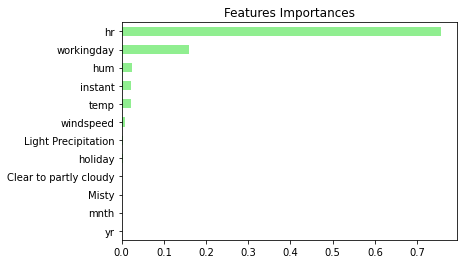

In [57]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Aparentemente, hr (la hora) y la workingday (jornada laboral) son las características más importantes según rf. ¡La importancia de estas dos características suman más del 90%!

## 4. Boosting

Boosting se refiere a un método de conjunto en el que varios modelos se entrenan secuencialmente y cada modelo aprende de los errores de sus predecesores. En este capítulo, se le presentarán los dos métodos de refuerzo de AdaBoost y Gradient Boosting.

### Adaboost

In [58]:
# Metodo de conjunto en donde muchos predictores son entrenados 
# Y cada predictor aprende de los errores de su predecesor

In [59]:
# Adaboost <> Cada predictor presta mas atencion a las instancias de forma incorrecta

el conjunto de datos del paciente indio de hígado que se presentó en un capítulo anterior. Su tarea es predecir si un paciente sufre de una enfermedad hepática utilizando 10 características que incluyen albúmina, edad y sexo. Sin embargo, esta vez, entrenará un conjunto AdaBoost para realizar la tarea de clasificación. Además, dado que este conjunto de datos está desequilibrado, utilizará la puntuación ROC AUC como métrica en lugar de precisión.

In [60]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/indian_liver_patient_preprocessed.csv')
df.head()

X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3,random_state=SEED)


In [62]:
# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

¡Buen trabajo! A continuación, evaluará la puntuación ROC AUC de ada.

Recuerde que la puntuación ROC AUC de un clasificador binario se puede determinar utilizando la función roc_auc_score () de sklearn.metric

In [63]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.72


¡Nada mal! ¡Este clasificador AdaBoost no sintonizado logró una puntuación ROC AUC de 0,71!

### Gradient Boosting (GB)



In [64]:
# Gradient Boosting
# Ganar muchos concursos de aprendizaje automatico

Recuerde que su tarea es predecir la demanda de alquiler de bicicletas utilizando datos meteorológicos históricos del programa Capital Bikeshare en Washington, D.C .. Para este propósito, utilizará un regresor de aumento de gradiente

In [65]:
#Bike Sharing Demand
SEED = 1

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/bikes.csv')
df.head()

X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=SEED)

In [66]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

¡Impresionante! Es hora de entrenar al regresor y predecir las etiquetas de los conjuntos de prueba.

In [67]:
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

¡Buen trabajo! ¡Es hora de evaluar el equipo de prueba RMSE!

In [68]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = (mse_test)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.113


### Stochastic Gradient Boosting (SGB)



In [70]:
#  El aumento de la gradiente implica un procedimiento de busqueda exhaustivo

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

In [71]:
# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [72]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = (mse_test)**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 45.143


El regresor de impulso de gradiente estocástico logra un conjunto de prueba RMSE más bajo que el regresor de impulso de gradiente (que era 52.065).

## 5. Model Tuning
**(Ajuste del modelo)**

Los hiperparámetros de un modelo de aprendizaje automático son parámetros que no se aprenden de los datos. Deben establecerse antes de ajustar el modelo al conjunto de entrenamiento. En este capítulo, aprenderá a ajustar los hiperparámetros de un modelo basado en árbol mediante la validación cruzada de búsqueda de cuadrícula.

### Tuning a CART's Hyperparameters

In [65]:
# Para tener un mejor rendimiento hay que afinar los hiperparametros de un aprendizaje automatico

In [74]:
# Score:
# CLASIFICACION - ACCURACY
# REGRESION - R2

In [75]:
# Define params_dt
params_dt = {
    'max_depth':[2, 3,4],
    'min_samples_leaf':[0.12, 0.14,0.16, 0.18]
}

In [80]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

ajustaremos el modelo a los datos de entrenamiento por usted y en el próximo ejercicio calculará la puntuación ROC AUC del conjunto de pruebas.

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/indian_liver_patient_preprocessed.csv')
df.head()

X = df.drop('Liver_disease', axis=1)
y = df['Liver_disease']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=SEED)

In [82]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
           

In [83]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


In [84]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.731


¡Buen trabajo! ¡Un árbol de clasificación no ajustado alcanzaría una puntuación ROC AUC de 0,54!

### Tuning a RF's Hyperparameters

In [85]:
SEED = 1

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/27.%20Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/dataset/bikes.csv')
df.head()

X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=SEED)

In [92]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators':[100, 350, 500],
    'max_features':['log2', 'auto', 'sqrt'],
    'min_samples_leaf':[2, 10, 30]
}

In [95]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [97]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   44.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [98]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.755
